In [16]:
!pip install scapy pandas


In [17]:
from scapy.all import PcapReader, TCP, UDP, ICMP


In [18]:
def load_pcap(file_path):
    """Reads a PCAP/PCAPNG file and returns all packets."""
    packets = []
    with PcapReader(file_path) as pcap:
        for pkt in pcap:
            packets.append(pkt)
    return packets



In [19]:
def detect_syn_flood(packets):
    """Counts TCP SYN packets, which indicate a SYN Flood attack."""
    syn_count = sum(1 for pkt in packets if pkt.haslayer(TCP) and pkt[TCP].flags == "S")
    return syn_count, len(packets)

def detect_ping_flood(packets):
    """Counts ICMP Echo Requests, which indicate a Ping Flood attack."""
    ping_count = sum(1 for pkt in packets if pkt.haslayer(ICMP) and pkt[ICMP].type == 8)
    return ping_count, len(packets)

def detect_udp_snmp_flood(packets):
    """Counts UDP packets to SNMP ports (161, 162), which indicate a UDP-SNMP Flood attack."""
    udp_count = sum(1 for pkt in packets if pkt.haslayer(UDP) and pkt[UDP].dport in [161, 162])
    return udp_count, len(packets)


In [20]:
# Load packets from PCAP/PCAPNG files
file1_packets = load_pcap("File 1.pcapng")
file2_packets = load_pcap("File 2.pcap")
file3_packets = load_pcap("File 3.pcapng")


In [26]:
def analyze_file(file_name, packets):
    """Determines whether a flooding attack occurred and reports the details."""
    syn_flood, total_packets = detect_syn_flood(packets)
    ping_flood, _ = detect_ping_flood(packets)
    udp_flood, _ = detect_udp_snmp_flood(packets)

    if syn_flood > total_packets * 0.1: 
        attack_type = "SYN Flood"
        flood_count = syn_flood
    elif ping_flood > 0:
        attack_type = "Ping Flood"
        flood_count = ping_flood
    elif udp_flood > 0:
        attack_type = "UDP-SNMP Flood"
        flood_count = udp_flood
    else:
        attack_type = "No flooding attack"
        flood_count = 0

    print(f"{file_name} – {attack_type} – {flood_count}/{total_packets} flooding packets")
    return file_name, attack_type, flood_count, total_packets


In [27]:
results = []
results.append(analyze_file("File 1", file1_packets))
results.append(analyze_file("File 2", file2_packets))
results.append(analyze_file("File 3", file3_packets))


File 1 – SYN Flood – 344/896 flooding packets
File 2 – Ping Flood – 9889/10000 flooding packets
File 3 – No flooding attack – 0/4373 flooding packets


In [28]:
!pip install matplotlib seaborn



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



In [30]:
def plot_pie_chart(file_name, attack_type, flood_count, total_packets):
    """Plots a pie chart of flooding packets vs. normal traffic."""
    labels = [attack_type, "Normal Traffic"]
    sizes = [flood_count, total_packets - flood_count]
    colors = ["red", "blue"]
    
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
    plt.title(f"Flooding Attack Ratio in {file_name}")
    plt.show()



In [31]:
def get_protocol_distribution(packets):
    """Counts occurrences of TCP, UDP, ICMP, and Other packets."""
    protocol_counts = Counter()
    for pkt in packets:
        if pkt.haslayer(TCP):
            protocol_counts["TCP"] += 1
        elif pkt.haslayer(UDP):
            protocol_counts["UDP"] += 1
        elif pkt.haslayer(ICMP):
            protocol_counts["ICMP"] += 1
        else:
            protocol_counts["Other"] += 1
    return protocol_counts

def plot_bar_chart(file_name, packets):
    """Plots a bar chart of packet types in the file."""
    protocol_counts = get_protocol_distribution(packets)
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(protocol_counts.keys()), y=list(protocol_counts.values()), palette="viridis")
    plt.xlabel("Protocol Type")
    plt.ylabel("Packet Count")
    plt.title(f"Protocol Distribution in {file_name}")
    plt.show()


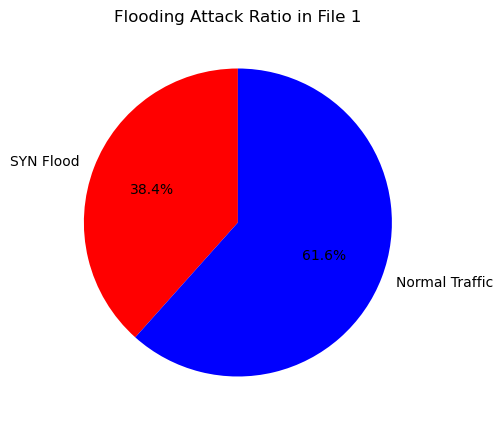

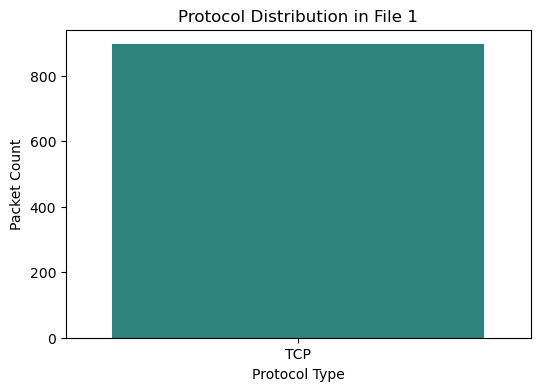

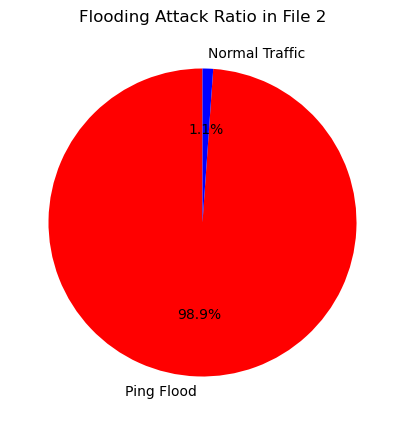

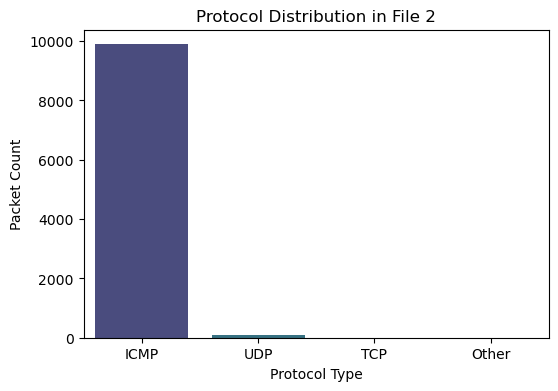

In [32]:
# List of results from Question 1
results = [
    ("File 1", "SYN Flood", 344, 896),
    ("File 2", "Ping Flood", 9889, 10000),
    ("File 3", "No flooding attack", 0, 4373)
]

# Load packets from PCAP files 
file1_packets = load_pcap("File 1.pcapng")
file2_packets = load_pcap("File 2.pcap")

# Generate Pie & Bar Charts for Affected Files
for file_name, attack_type, flood_count, total_packets in results:
    if attack_type != "No flooding attack":  # Only visualize affected files
        plot_pie_chart(file_name, attack_type, flood_count, total_packets)
        
        if file_name == "File 1":
            plot_bar_chart(file_name, file1_packets)
        elif file_name == "File 2":
            plot_bar_chart(file_name, file2_packets)

